<a href="https://colab.research.google.com/github/CryptoRobotFr/TrueStrategy/blob/main/TrixStrategy/Trix_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
pip install python-binance

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install ta

Note: you may need to restart the kernel to use updated packages.


<h1>Load yours data</h1>

In [14]:
# -- Import --
import pandas as pd
from binance.client import Client
import ta
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
import time
from math import *
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# -- Define Binance Client --
client = Client()

# -- You can change the crypto pair ,the start date and the time interval below --
pairName = "ETHUSDT"
startDate = "01 january 2017"
timeInterval = Client.KLINE_INTERVAL_1HOUR

# -- Load all price data from binance API --
klinesT = client.get_historical_klines(pairName, timeInterval, startDate)

# -- Define your dataset --
df = pd.DataFrame(klinesT, columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_av', 'trades', 'tb_base_av', 'tb_quote_av', 'ignore' ])
df['close'] = pd.to_numeric(df['close'])
df['high'] = pd.to_numeric(df['high'])
df['low'] = pd.to_numeric(df['low'])
df['open'] = pd.to_numeric(df['open'])

# -- Set the date to index --
df = df.set_index(df['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
del df['timestamp']

print("Data loaded 100%")

# -- Uncomment the line below if you want to check your price dataset --
# df

Data loaded 100%


<h1>Define your indicators</h1>

In [15]:
# -- Drop all columns we do not need --
df.drop(df.columns.difference(['open','high','low','close','volume']), 1, inplace=True)

# -- Indicators, you can edit every value --
df['EMA200'] = ta.trend.ema_indicator(close=df['close'], window=200)
# -- Trix Indicator --
trixLength = 7
trixSignal = 15
df['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=df['close'], window=trixLength), window=trixLength), window=trixLength)
df['TRIX_PCT'] = df["TRIX"].pct_change()*100
df['TRIX_SIGNAL'] = ta.trend.sma_indicator(df['TRIX_PCT'],trixSignal)
df['TRIX_HISTO'] = df['TRIX_PCT'] - df['TRIX_SIGNAL']


# -- Stochasitc RSI --
df['STOCH_RSI'] = ta.momentum.stochrsi(close=df['close'], window=12, smooth1=3, smooth2=3)
stochTop = 0.7
stochBottom = 0.28

print("Indicators loaded 100%")

# -- Uncomment the line below if you want to check your dataset with indicators --
df

Indicators loaded 100%


C:\Users\Reakord\AppData\Local\Temp\ipykernel_8552\3064986345.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['open','high','low','close','volume']), 1, inplace=True)


,open,high,low,close,volume,EMA200,TRIX,TRIX_PCT,TRIX_SIGNAL,TRIX_HISTO,STOCH_RSI
timestamp,,,,,,,,,,,
2017-08-17 04:00:00,301.13,302.57,298.00,301.61,125.66877000,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 05:00:00,301.61,303.28,300.00,303.10,377.67246000,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 06:00:00,302.40,304.44,301.90,302.68,303.86672000,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 07:00:00,302.68,307.96,302.60,307.96,754.74510000,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 08:00:00,307.95,309.97,307.00,308.62,150.75029000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-09 12:00:00,1287.84,1296.64,1279.03,1286.05,36516.76830000,1255.578874,1279.385950,0.071607,0.165562,-0.093955,0.386641
2022-12-09 13:00:00,1286.06,1286.71,1250.00,1275.03,59561.87700000,1255.772418,1280.069647,0.053439,0.150305,-0.096866,0.000000
2022-12-09 14:00:00,1275.04,1275.71,1265.40,1272.96,20448.09860000,1255.943439,1280.437647,0.028748,0.133727,-0.104978,0.000000


<h1>1 Parameter optimizer</h1>

Loading... 23 / 23


C:\Users\Reakord\AppData\Local\Temp\ipykernel_8552\3862197638.py:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)


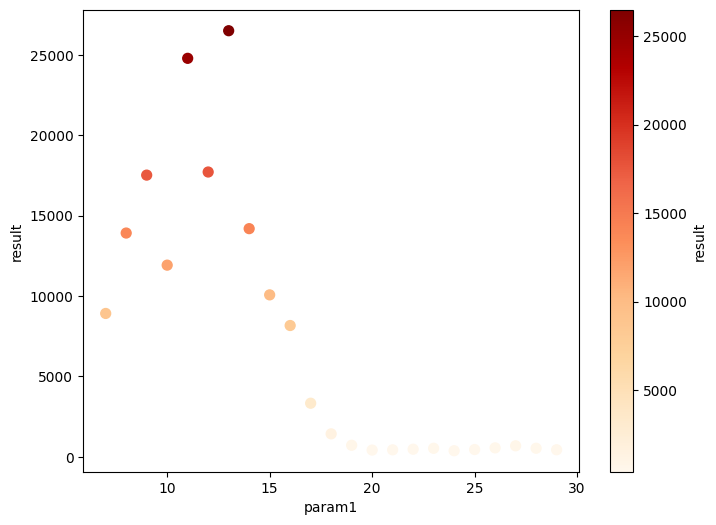

    param1        result
17    24.0    382.233717
13    20.0    423.360409
14    21.0    437.915987
22    29.0    441.519833
18    25.0    456.039323
15    22.0    476.341309
16    23.0    533.530554
21    28.0    536.619182
19    26.0    559.937533
20    27.0    688.643184
12    19.0    721.465359
11    18.0   1431.852475
10    17.0   3335.505090
9     16.0   8168.728913
0      7.0   8918.436087
8     15.0  10074.387593
3     10.0  11922.665018
1      8.0  13919.000155
7     14.0  14192.305877
2      9.0  17521.479341
5     12.0  17714.729846
4     11.0  24784.341854
6     13.0  26500.634928


In [16]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df['2017-08-17':]

# -- Condition to BUY market --
def buyCondition(row):
  if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < stochTop:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > stochBottom:
    return True
  else:
    return False

loopI = [7,30,1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

count = 0
maxCount = enumI
for i in range(loopI[0], loopI[1], loopI[2]):
  clear_output(wait=True)
  count += 1
  print("Loading...",count,'/',maxCount)
  # -- You can change variables below --
  usdt = 1000
  coin = 0

  dfTest['STOCH_RSI'] = ta.momentum.stochrsi(close=dfTest['close'], window=i, smooth1=3, smooth2=3)

  for index, row in dfTest.iterrows():
    #BUY
    if buyCondition(row) and usdt > 0:
      coin = (usdt/dfTest['close'][index]) - 0.0007*(usdt/dfTest['close'][index])
      usdt = 0

    #SELL
    elif sellCondition(row) and coin > 0:
      usdt = coin*dfTest['close'][index] - (0.0007*coin*dfTest['close'][index])
      coin = 0

  myrow = {'param1': i,'result': coin*dfTest.iloc[len(dfTest)-1]['close'] + usdt}
  dt = dt.append(myrow,ignore_index=True)   

dt.plot.scatter(x='param1',y=1,c='result',s=50,colormap='OrRd',figsize=(8,6))
plt.show()

print(dt.sort_values(by=['result']))

<h1>2 Parameters optimizer</h1>


Loading... 40 / 40


C:\Users\Reakord\AppData\Local\Temp\ipykernel_8552\159930934.py:61: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)


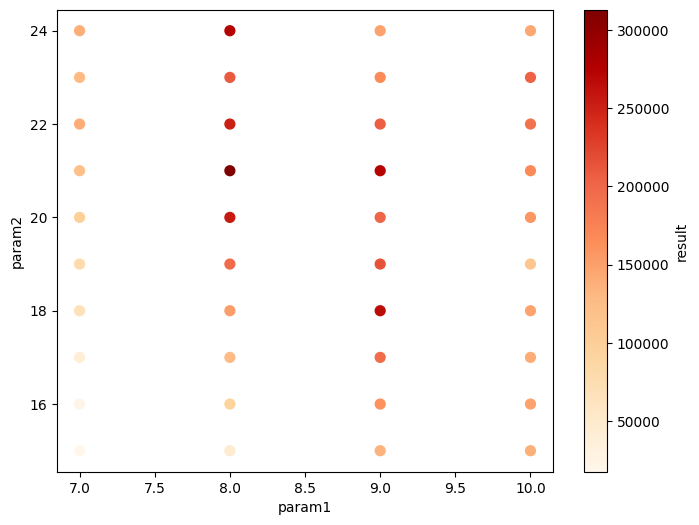

    param1  param2         result
0      7.0    15.0   17714.729846
1      7.0    16.0   23747.382218
2      7.0    17.0   40807.595537
10     8.0    15.0   47693.939934
3      7.0    18.0   67793.712903
4      7.0    19.0   78758.684219
11     8.0    16.0   92046.930324
5      7.0    20.0   99068.287001
34    10.0    19.0  111382.517239
6      7.0    21.0  120954.440896
12     8.0    17.0  128396.361705
8      7.0    23.0  129256.546363
20     9.0    15.0  135163.139401
30    10.0    15.0  138178.144230
9      7.0    24.0  138748.154667
7      7.0    22.0  140579.523476
32    10.0    17.0  140822.169497
39    10.0    24.0  144089.819208
33    10.0    18.0  147529.551175
31    10.0    16.0  149002.127893
29     9.0    24.0  149012.031885
13     8.0    18.0  152377.860828
35    10.0    20.0  158318.705701
21     9.0    16.0  161033.526627
28     9.0    23.0  166611.260054
36    10.0    21.0  168619.558126
37    10.0    22.0  190120.400270
22     9.0    17.0  195910.247238
14     8.0    

In [17]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1','param2', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df['2017-08-17':]


# -- Condition to BUY market --
def buyCondition(row):
  if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < stochTop:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row):
  if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > stochBottom:
    return True
  else:
    return False

loopI = [7,11,1]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

loopJ = [15,25,1]
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

count = 0
maxCount = enumI * enumJ
for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    clear_output(wait=True)
    count += 1
    print("Loading...",count,'/',maxCount)
    # -- You can change variables below --
    usdt = 1000
    coin = 0

    trixLength = i
    trixSignal = j
    dfTest['TRIX'] = ta.trend.ema_indicator(ta.trend.ema_indicator(ta.trend.ema_indicator(close=dfTest['close'], window=trixLength), window=trixLength), window=trixLength)
    dfTest['TRIX_PCT'] = dfTest["TRIX"].pct_change()*100
    dfTest['TRIX_SIGNAL'] = ta.trend.sma_indicator(dfTest['TRIX_PCT'],trixSignal)
    dfTest['TRIX_HISTO'] = dfTest['TRIX_PCT'] - dfTest['TRIX_SIGNAL']

    for index, row in dfTest.iterrows():
      #BUY
      if buyCondition(row) and usdt > 0:
        coin = (usdt/dfTest['close'][index]) - 0.0007*(usdt/dfTest['close'][index])
        usdt = 0

      #SELL
      elif sellCondition(row) and coin > 0:
        usdt = coin*dfTest['close'][index] - (0.0007*coin*dfTest['close'][index])
        coin = 0

    myrow = {'param1': i, 'param2': j,'result': coin*dfTest.iloc[len(dfTest)-1]['close'] + usdt}
    dt = dt.append(myrow,ignore_index=True)   

dt.plot.scatter(x='param1',y='param2',c='result',s=50,colormap='OrRd',figsize=(8,6))
plt.show()

print(dt.sort_values(by=['result']))

<h1>3 Parameters optimizer</h1>

In [18]:
dfTest = None
dt = None
dt = pd.DataFrame(columns = ['param1','param2', 'param3', 'result'])

# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df['2017-08-17':]


# -- Condition to BUY market --
def buyCondition(row, param):
  if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < param:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row, param):
  if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > param:
    return True
  else:
    return False

loopI = [70,90,3]
enumI = ceil((loopI[1] - loopI[0]) / loopI[2])

loopJ = [10,30,3]
enumJ = ceil((loopJ[1] - loopJ[0]) / loopJ[2])

loopK = [12,16,1]
enumK = ceil((loopK[1] - loopK[0]) / loopK[2])

count = 0
maxCount = enumI * enumJ * enumK
for i in range(loopI[0], loopI[1], loopI[2]):
  for j in range(loopJ[0], loopJ[1], loopJ[2]):
    for k in range(loopK[0], loopK[1], loopK[2]):
      clear_output(wait=True)
      count += 1
      print("Loading...",count,'/',maxCount)
      # -- You can change variables below --
      usdt = 1000
      coin = 0

      trixLength = i
      trixSignal = j
      dfTest['STOCH_RSI'] = ta.momentum.stochrsi(close=dfTest['close'], window=k, smooth1=3, smooth2=3)

      for index, row in dfTest.iterrows():
        #BUY
        if buyCondition(row, i/100) and usdt > 0:
          coin = (usdt/dfTest['close'][index]) - 0.0007*(usdt/dfTest['close'][index])
          usdt = 0

        #SELL
        elif sellCondition(row, j/100) and coin > 0:
          usdt = coin*dfTest['close'][index] - (0.0007*coin*dfTest['close'][index])
          coin = 0

      myrow = {'param1': i, 'param2': j, 'param3': k,'result': coin*dfTest.iloc[len(dfTest)-1]['close'] + usdt}
      dt = dt.append(myrow,ignore_index=True)   

# dt.plot.scatter(x='param1',y='param2',c='result',s=50,colormap='rainbow',figsize=(8,6))
# plt.show()

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(dt['param1'], dt['param2'], dt['param3'],c=dt['result'],cmap='OrRd', s=30)
plt.show()

print(dt.sort_values(by=['result']))

Loading... 196 / 196


C:\Users\Reakord\AppData\Local\Temp\ipykernel_8552\1278637423.py:62: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)


<Figure size 640x480 with 0 Axes>

     param1  param2  param3        result
171    88.0    10.0    15.0   1988.935757
143    85.0    10.0    15.0   2403.405168
175    88.0    13.0    15.0   2610.570564
179    88.0    16.0    15.0   2693.134449
31     73.0    10.0    15.0   3061.019885
..      ...     ...     ...           ...
17     70.0    22.0    13.0  21736.131117
21     70.0    25.0    13.0  23805.507565
80     76.0    28.0    12.0  26315.986066
25     70.0    28.0    13.0  26500.634928
76     76.0    25.0    12.0  26501.868707

[196 rows x 4 columns]


<h1>RUN the Spot Backtest</h1>

In [19]:
dfTest = None
# dfTest = df.copy()

# -- If you want to run your BackTest on a specific period, uncomment the line below --
dfTest = df['2017-08-17':]

# -- Definition of dt, that will be the dataset to do your trades analyses --
dt = None
dt = pd.DataFrame(columns = ['date','position', 'reason', 'price', 'frais' ,'fiat', 'coins', 'wallet', 'drawBack'])

# -- You can change variables below --
usdt = 1000
makerFee = 0.0002
takerFee = 0.0007

# -- Do not touch these values --
initalWallet = usdt
wallet = usdt
coin = 0
lastAth = 0
previousRow = dfTest.iloc[0]
stopLoss = 0
takeProfit = 500000
buyReady = True
sellReady = True

# -- Condition to BUY market --
def buyCondition(row, previousRow):
  if row['TRIX_HISTO'] > 0 and row['STOCH_RSI'] < stochTop:
    return True
  else:
    return False

# -- Condition to SELL market --  
def sellCondition(row, previousRow):
  if row['TRIX_HISTO'] < 0 and row['STOCH_RSI'] > stochBottom:
    return True
  else:
    return False

# -- Iteration on all your price dataset (df) --
for index, row in dfTest.iterrows():
  # -- Buy market order --
  if buyCondition(row, previousRow) and usdt > 0 and buyReady == True:
    # -- You can define here at what price you buy --
    buyPrice = row['close']

    # -- Define the price of you SL and TP or comment it if you don't want a SL or TP --
    # stopLoss = buyPrice - 0.02 * buyPrice
    # takeProfit = buyPrice + 0.04 * buyPrice

    coin = usdt / buyPrice
    fee = takerFee * coin
    coin = coin - fee
    usdt = 0
    wallet = coin * row['close']

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --
    # print("Buy COIN at",buyPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index, 'position': "Buy", 'reason':'Buy Market Order','price': buyPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  # -- Stop Loss --
  elif row['low'] < stopLoss and coin > 0:
    sellPrice = stopLoss
    usdt = coin * sellPrice
    fee = makerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = False
    wallet = usdt

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet
      
    # -- You can uncomment the line below if you want to see logs --
    # print("Sell COIN at Stop Loss",sellPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index,'position': "Sell", 'reason':'Sell Stop Loss','price': sellPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)    

  # -- Sell Market Order --
  elif sellCondition(row, previousRow) and coin > 0 and sellReady == True:

    # -- You can define here at what price you buy --
    sellPrice = row['close']
    usdt = coin * sellPrice
    fee = takerFee * usdt
    usdt = usdt - fee
    coin = 0
    buyReady = True
    wallet = usdt

    # -- Check if your wallet hit a new ATH to know the drawBack --
    if wallet > lastAth:
      lastAth = wallet

    # -- You can uncomment the line below if you want to see logs --  
    # print("Sell COIN at",sellPrice,'$ the', index)

    # -- Add the trade to DT to analyse it later --
    myrow = {'date': index,'position': "Sell", 'reason':'Sell Market Order','price': sellPrice,'frais': fee,'fiat': usdt,'coins': coin,'wallet': wallet,'drawBack':(wallet-lastAth)/lastAth}
    dt = dt.append(myrow,ignore_index=True)
  
  previousRow = row

# -- BackTest Analyses --
dt = dt.set_index(dt['date'])
dt.index = pd.to_datetime(dt.index)
dt['resultat'] = dt['wallet'].diff()
dt['resultat%'] = dt['wallet'].pct_change()*100
dt.loc[dt['position']=='Buy','resultat'] = None
dt.loc[dt['position']=='Buy','resultat%'] = None

dt['tradeIs'] = ''
dt.loc[dt['resultat']>0,'tradeIs'] = 'Good'
dt.loc[dt['resultat']<=0,'tradeIs'] = 'Bad'

iniClose = dfTest.iloc[0]['close']
lastClose = dfTest.iloc[len(dfTest)-1]['close']
holdPercentage = ((lastClose - iniClose)/iniClose) * 100
algoPercentage = ((wallet - initalWallet)/initalWallet) * 100
vsHoldPercentage = ((algoPercentage - holdPercentage)/holdPercentage) * 100

try:
    tradesPerformance = round(dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].sum()
            / dt.loc[(dt['tradeIs'] == 'Good') | (dt['tradeIs'] == 'Bad'), 'resultat%'].count(), 2)
except:
    tradesPerformance = 0
    print("/!\ There is no Good or Bad Trades in your BackTest, maybe a problem...")

try:
    totalGoodTrades = dt.groupby('tradeIs')['date'].nunique()['Good']
    AveragePercentagePositivTrades = round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].count(), 2)
    idbest = dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].idxmax()
    bestTrade = str(
        round(dt.loc[dt['tradeIs'] == 'Good', 'resultat%'].max(), 2))
except:
    totalGoodTrades = 0
    AveragePercentagePositivTrades = 0
    idbest = ''
    bestTrade = 0
    print("/!\ There is no Good Trades in your BackTest, maybe a problem...")

try:
    totalBadTrades = dt.groupby('tradeIs')['date'].nunique()['Bad']
    AveragePercentageNegativTrades = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].sum()
                                           / dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].count(), 2)
    idworst = dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].idxmin()
    worstTrade = round(dt.loc[dt['tradeIs'] == 'Bad', 'resultat%'].min(), 2)
except:
    totalBadTrades = 0
    AveragePercentageNegativTrades = 0
    idworst = ''
    worstTrade = 0
    print("/!\ There is no Bad Trades in your BackTest, maybe a problem...")

totalTrades = totalBadTrades + totalGoodTrades
winRateRatio = (totalGoodTrades/totalTrades) * 100

reasons = dt['reason'].unique()

dt

C:\Users\Reakord\AppData\Local\Temp\ipykernel_8552\3890309573.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
C:\Users\Reakord\AppData\Local\Temp\ipykernel_8552\3890309573.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
C:\Users\Reakord\AppData\Local\Temp\ipykernel_8552\3890309573.py:67: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
C:\Users\Reakord\AppData\Local\Temp\ipykernel_8552\3890309573.py:111: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dt = dt.append(myrow,ignore_index=True)
C:\Users\Reakord\AppDa

,date,position,reason,price,frais,fiat,coins,wallet,drawBack,resultat,resultat%,tradeIs
date,,,,,,,,,,,,
2017-08-18 13:00:00,2017-08-18 13:00:00,Buy,Buy Market Order,303.22,0.002309,0,3.295627,999.300000,0.000000,NaN,NaN,
2017-08-18 19:00:00,2017-08-18 19:00:00,Sell,Sell Market Order,293.83,0.677848,967.676215,0.000000,967.676215,-0.031646,-31.623785,-3.164594,Bad
2017-08-19 03:00:00,2017-08-19 03:00:00,Buy,Buy Market Order,293.22,0.002310,0,3.297861,966.998842,-0.032324,NaN,NaN,
2017-08-19 12:00:00,2017-08-19 12:00:00,Sell,Sell Market Order,290.85,0.671428,958.511483,0.000000,958.511483,-0.040817,-8.487359,-0.877701,Bad
2017-08-19 23:00:00,2017-08-19 23:00:00,Buy,Buy Market Order,290.91,0.002306,0,3.292567,957.840525,-0.041489,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-06 00:00:00,2022-12-06 00:00:00,Sell,Sell Market Order,1266.60,12.115147,17295.23808,0.000000,17295.238080,-0.706982,147.211979,0.858478,Good
2022-12-06 05:00:00,2022-12-06 05:00:00,Buy,Buy Market Order,1256.76,0.009633,0,13.752134,17283.131413,-0.707187,NaN,NaN,
2022-12-07 13:00:00,2022-12-07 13:00:00,Sell,Sell Market Order,1232.75,11.867060,16941.075626,0.000000,16941.075626,-0.712983,-342.055787,-1.979131,Bad


<h1>Print Complete BackTest Analyses</h1>

In [22]:
print("Pair Symbol :",pairName)
print("Period : [" + str(dfTest.index[0]) + "] -> [" +
      str(dfTest.index[len(dfTest)-1]) + "]")
print("Starting balance :", initalWallet, "$")

print("\n----- General Informations -----")
print("Final balance :", round(wallet, 2), "$")
print("Performance vs US Dollar :", round(algoPercentage, 2), "%")
print("Buy and Hold Performence :", round(holdPercentage, 2), "%")
print("Performance vs Buy and Hold :", round(vsHoldPercentage, 2), "%")
print("Best trade : +"+bestTrade, "%, the", idbest)
print("Worst trade :", worstTrade, "%, the", idworst)
print("Worst drawBack :", str(100*round(dt['drawBack'].min(), 2)), "%")
print("Total fees : ", round(dt['frais'].sum(), 2), "$")

print("\n----- Trades Informations -----")
print("Total trades on period :",totalTrades)
print("Number of positive trades :", totalGoodTrades)
print("Number of negative trades : ", totalBadTrades)
print("Trades win rate ratio :", round(winRateRatio, 2), '%')
print("Average trades performance :",tradesPerformance,"%")
print("Average positive trades :", AveragePercentagePositivTrades, "%")
print("Average negative trades :", AveragePercentageNegativTrades, "%")

print("\n----- Trades Reasons -----")
reasons = dt['reason'].unique()
for r in reasons:
    print(r+" number :", dt.groupby('reason')['date'].nunique()[r])

Pair Symbol : ETHUSDT
Period : [2017-08-17 04:00:00] -> [2022-12-09 16:00:00]
Starting balance : 1000 $

----- General Informations -----
Final balance : 17714.73 $
Performance vs US Dollar : 1671.47 %
Buy and Hold Performence : 322.6 %
Performance vs Buy and Hold : 418.13 %
Best trade : +21.44 %, the 2021-05-25 00:00:00
Worst trade : -17.52 %, the 2018-08-14 02:00:00
Worst drawBack : -76.0 %
Total fees :  13637.42 $

----- Trades Informations -----
Total trades on period : 1674
Number of positive trades : 827
Number of negative trades :  847
Trades win rate ratio : 49.4 %
Average trades performance : 0.31 %
Average positive trades : 2.75 %
Average negative trades : -2.06 %

----- Trades Reasons -----
Buy Market Order number : 1674
Sell Market Order number : 1674


<h1>Plot to improve ...</h1>


----- Plot -----


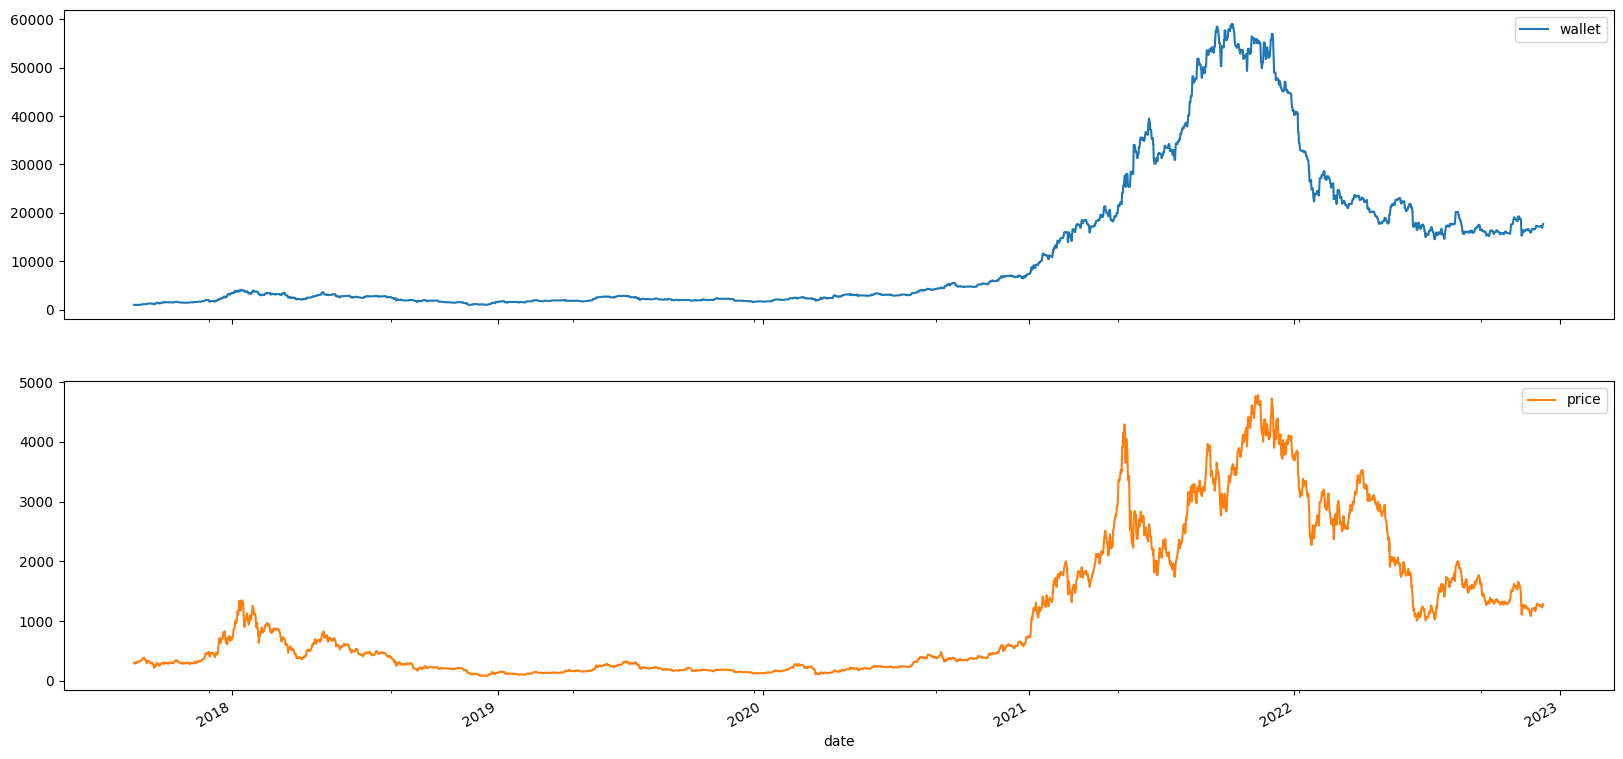

In [21]:
dt[['wallet', 'price']].plot(subplots=True, figsize=(20, 10))
print("\n----- Plot -----")